# Double 7's (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average
    2. The SPY closes at a X-day low, buy some shares.
       If it falls further, buy some more, etc...
    3. If the SPY closes at a X-day high, sell your entire long position.
    
    (optimize for number of positions)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(2000, 1, 1)
#end = datetime.datetime(2010, 12, 1)
end = datetime.datetime.now()

Define high low trade periods

In [4]:
period = 7

Define max number of positions to scale into

In [5]:
pos = range(1, 10)
pos = [str(p) for p in pos]

Run Strategy

In [6]:
strategies = pd.Series(dtype=object)
for p in pos:
    print("{0}".format(p), end=" ")
    strategies[p] = strategy.Strategy(symbol, capital, start, end, period=period, max_positions=int(p))
    strategies[p].run()
    _, strategies[p].tlog, strategies[p].dbal = strategies[p].get_logs(merge_trades=True)
    strategies[p].stats = strategies[p].get_stats()

1 2 3 4 5 6 7 8 9 

Summarize results

In [7]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = strategy.summary(strategies, metrics)
df

,1,2,3,4,5,6,7,8,9
annual_return_rate,4.89,4.44,4.31,3.96,3.52,2.99,2.61,2.30,2.05
max_closed_out_drawdown,-14.84,-14.48,-11.31,-11.14,-9.16,-8.44,-7.85,-6.87,-6.12
drawdown_annualized_return,-3.03,-3.26,-2.63,-2.81,-2.60,-2.82,-3.01,-2.98,-2.99
drawdown_recovery,-1.79,-1.79,-2.08,-0.02,-0.07,-0.07,-0.07,-0.07,-0.07
best_month,9.94,6.93,6.25,4.97,4.80,4.81,4.80,4.14,3.67
worst_month,-11.27,-11.15,-10.37,-9.79,-8.36,-7.78,-7.28,-6.36,-5.66
sharpe_ratio,0.62,0.68,0.77,0.81,0.84,0.82,0.82,0.84,0.84
sortino_ratio,0.51,0.49,0.52,0.51,0.53,0.51,0.51,0.52,0.52
monthly_std,1.83,1.55,1.34,1.13,0.95,0.81,0.70,0.61,0.54
pct_time_in_market,28.17,28.17,28.17,28.17,28.17,28.17,28.17,28.17,28.17


Bar graphs

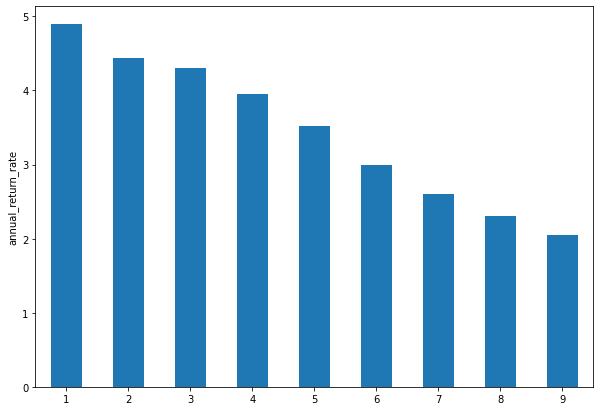

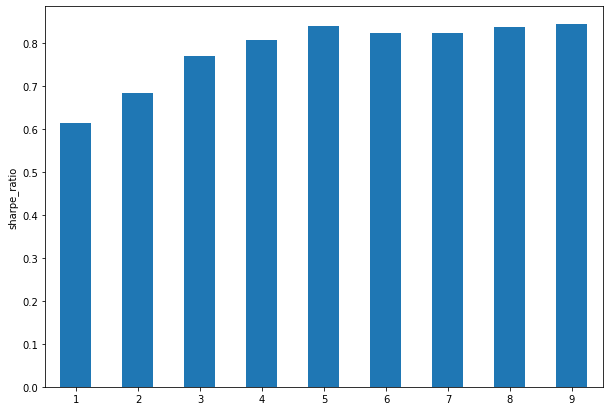

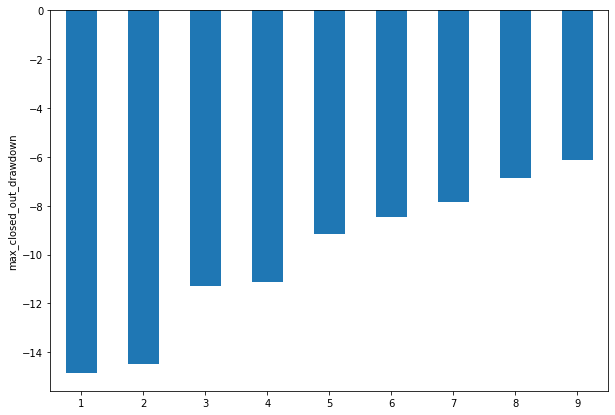

In [8]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [9]:
s = strategies[pos[0]]
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

2000-01-03 00:00:00 BUY  68 SPY @ 145.44
2020-06-22 00:00:00 SELL 68 SPY @ 310.67


Equity curve

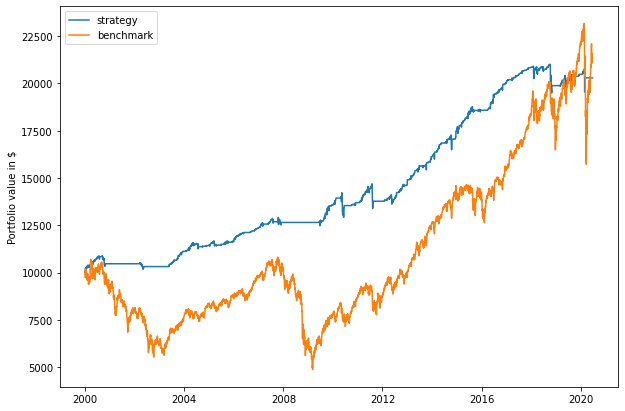

In [10]:
pf.plot_equity_curve(strategies['5'].dbal, benchmark=benchmark.dbal)